# Sobre wavelets
El objetivo del notebook es enseñar al alumno implementar librerías de aalisis wavelets para entender algunos conceptos básicos de la metodología. Se indagaran en señales sintéticas conocidas a las que se las filtrará usando el analisis de señales wavelets.

Se recomienda la lectura del artículo científico [Torrece and Compo (1998)](https://psl.noaa.gov/people/gilbert.p.compo/Torrence_compo1998.pdf).

La librería que usaremos en este caso será [Pywavelets](https://pypi.org/project/PyWavelets/):
* ``` pip install waipy```
* ``` pip install PyWavelets```
* ``` pip install pycwt```

Este notebook se basó en el repositorio desarrollado por [Waipy](https://github.com/mabelcalim/waipy)

In [1]:
# importamos la libreria mas importante para el analisis wavelets 
import waipy
import pywt
import math
import matplotlib.pyplot as plt
import pycwt as wavelet
import numpy as np
from pycwt.helpers import find
import pandas as pd
from matplotlib import pyplot

ModuleNotFoundError: No module named 'waipy'

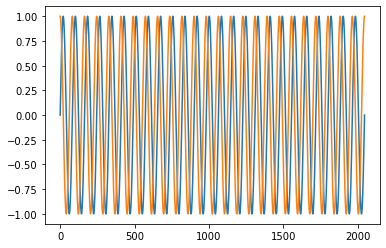

In [44]:
Construimos una señal conocida de tipo sinoidal y cosinoidal

# creamos la señal del tiempo (las dimensiones pueden ser arbitrarias en este punto)
z = np.linspace(0,2048,2048)
# creamos seno y coseno
x = np.sin(50*np.pi*z)
y = np.cos(50*np.pi*z)

#ploteamos
plt.plot(x)
plt.plot(y)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Nr of Scales: 80
scales [2.0, 2.1810154653305154, 2.378414230005442, 2.5936791093020193, 2.8284271247461903, 3.0844216508158815, 3.363585661014858, 3.668016172818685, 4.0, 4.362030930661031, 4.756828460010884, 5.187358218604039, 5.656854249492381, 6.168843301631763, 6.727171322029716, 7.33603234563737, 8.0, 8.724061861322062, 9.513656920021768, 10.374716437208077, 11.313708498984761, 12.337686603263526, 13.454342644059432, 14.67206469127474, 16.0, 17.448123722644123, 19.027313840043536, 20.749432874416154, 22.627416997969522, 24.675373206527052, 26.908685288118864, 29.34412938254948, 32.0, 34.896247445288246, 38.05462768008707, 41.49886574883231, 45.254833995939045, 49.350746413054104, 53.81737057623773, 58.68825876509896, 64.0, 69.79249489057649, 76.10925536017415, 82.99773149766462, 90.50966799187809, 98.70149282610821, 107.63474115247546, 117.37651753019792, 128.0, 139.58498978115298, 152.2185107

{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <AxesSubplot:title={'center':'Sine'}, ylabel='Amplitude'>,
 'ax_cwt': <AxesSubplot:xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <AxesSubplot:title={'center':'$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <AxesSubplot:title={'center':'Global Wavelet Spectrum'}, xlabel='Power'>}

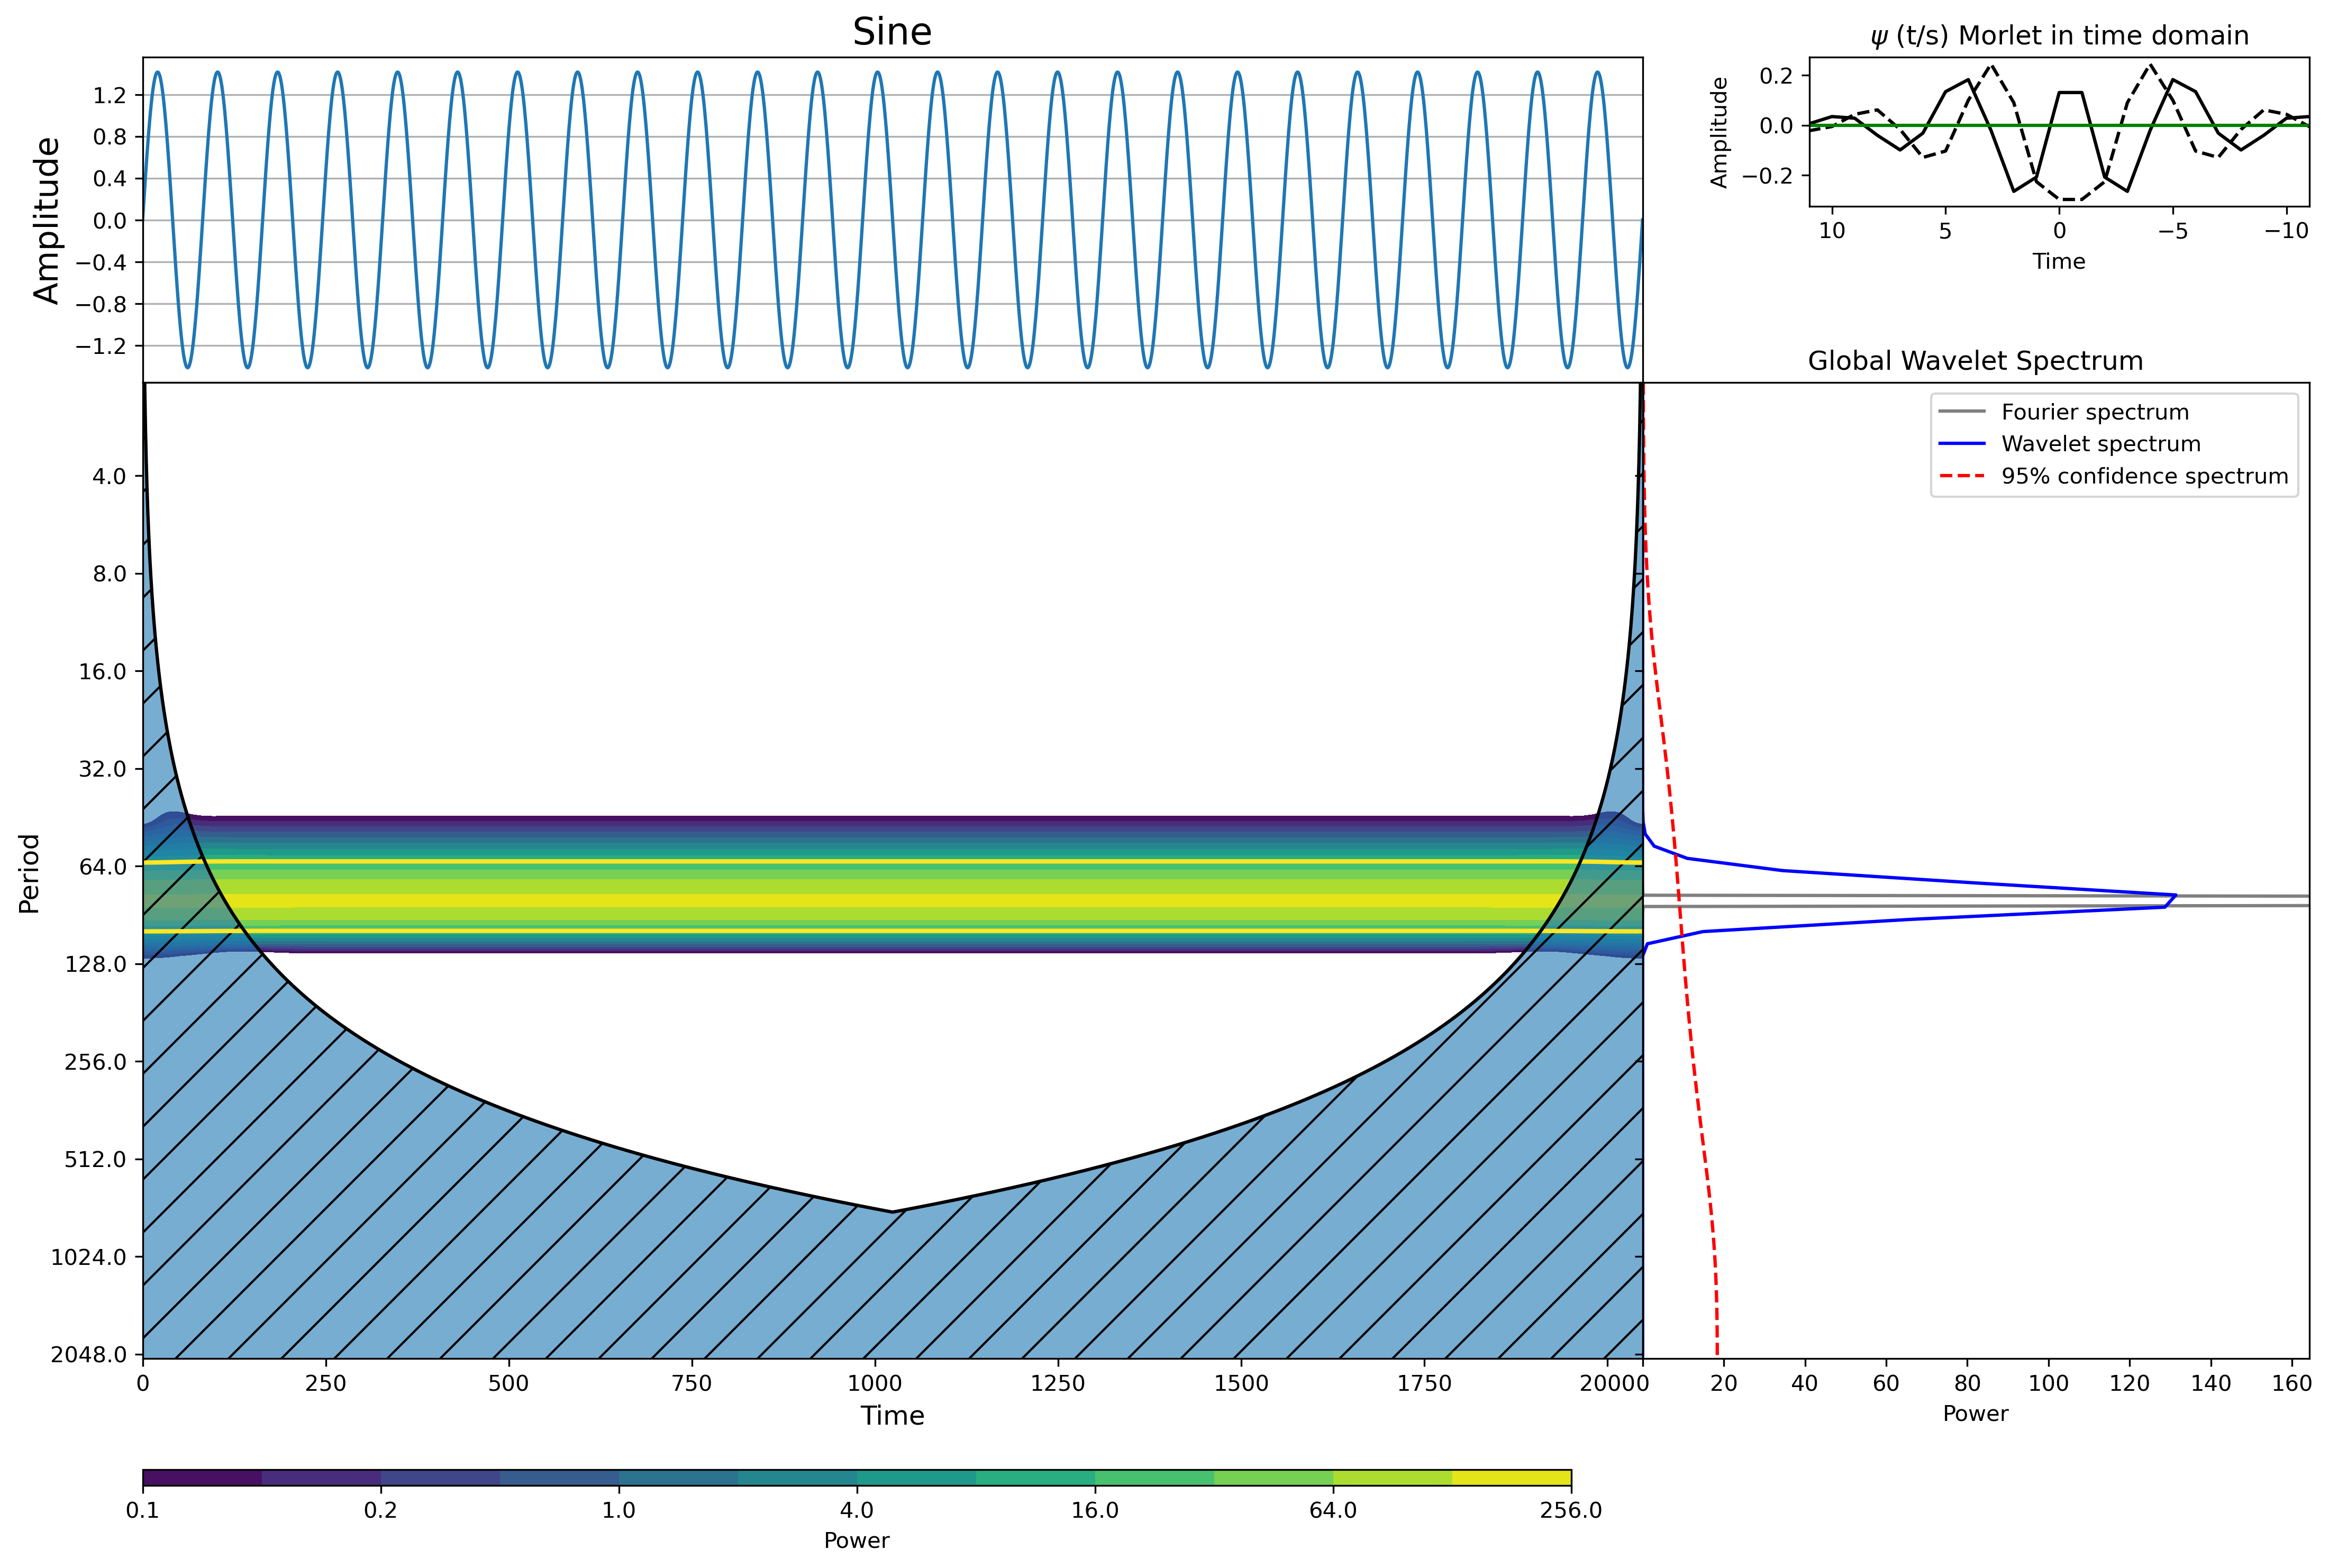

In [45]:
# llamamos a las librerías
%load_ext autoreload
%autoreload 2

#implementamos a la señal conocida 
data_norm = waipy.normalize(x)
result = waipy.cwt(data_norm, 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
waipy.wavelet_plot('Sine', z, data_norm, 0.03125, result)

Nr of Scales: 80
scales [2.0, 2.1810154653305154, 2.378414230005442, 2.5936791093020193, 2.8284271247461903, 3.0844216508158815, 3.363585661014858, 3.668016172818685, 4.0, 4.362030930661031, 4.756828460010884, 5.187358218604039, 5.656854249492381, 6.168843301631763, 6.727171322029716, 7.33603234563737, 8.0, 8.724061861322062, 9.513656920021768, 10.374716437208077, 11.313708498984761, 12.337686603263526, 13.454342644059432, 14.67206469127474, 16.0, 17.448123722644123, 19.027313840043536, 20.749432874416154, 22.627416997969522, 24.675373206527052, 26.908685288118864, 29.34412938254948, 32.0, 34.896247445288246, 38.05462768008707, 41.49886574883231, 45.254833995939045, 49.350746413054104, 53.81737057623773, 58.68825876509896, 64.0, 69.79249489057649, 76.10925536017415, 82.99773149766462, 90.50966799187809, 98.70149282610821, 107.63474115247546, 117.37651753019792, 128.0, 139.58498978115298, 152.2185107203483, 165.99546299532923, 181.01933598375618, 197.40298565221642, 215.2694823049509, 2

{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <AxesSubplot:title={'center':'Cosine'}, ylabel='Amplitude'>,
 'ax_cwt': <AxesSubplot:xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <AxesSubplot:title={'center':'$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <AxesSubplot:title={'center':'Global Wavelet Spectrum'}, xlabel='Power'>}

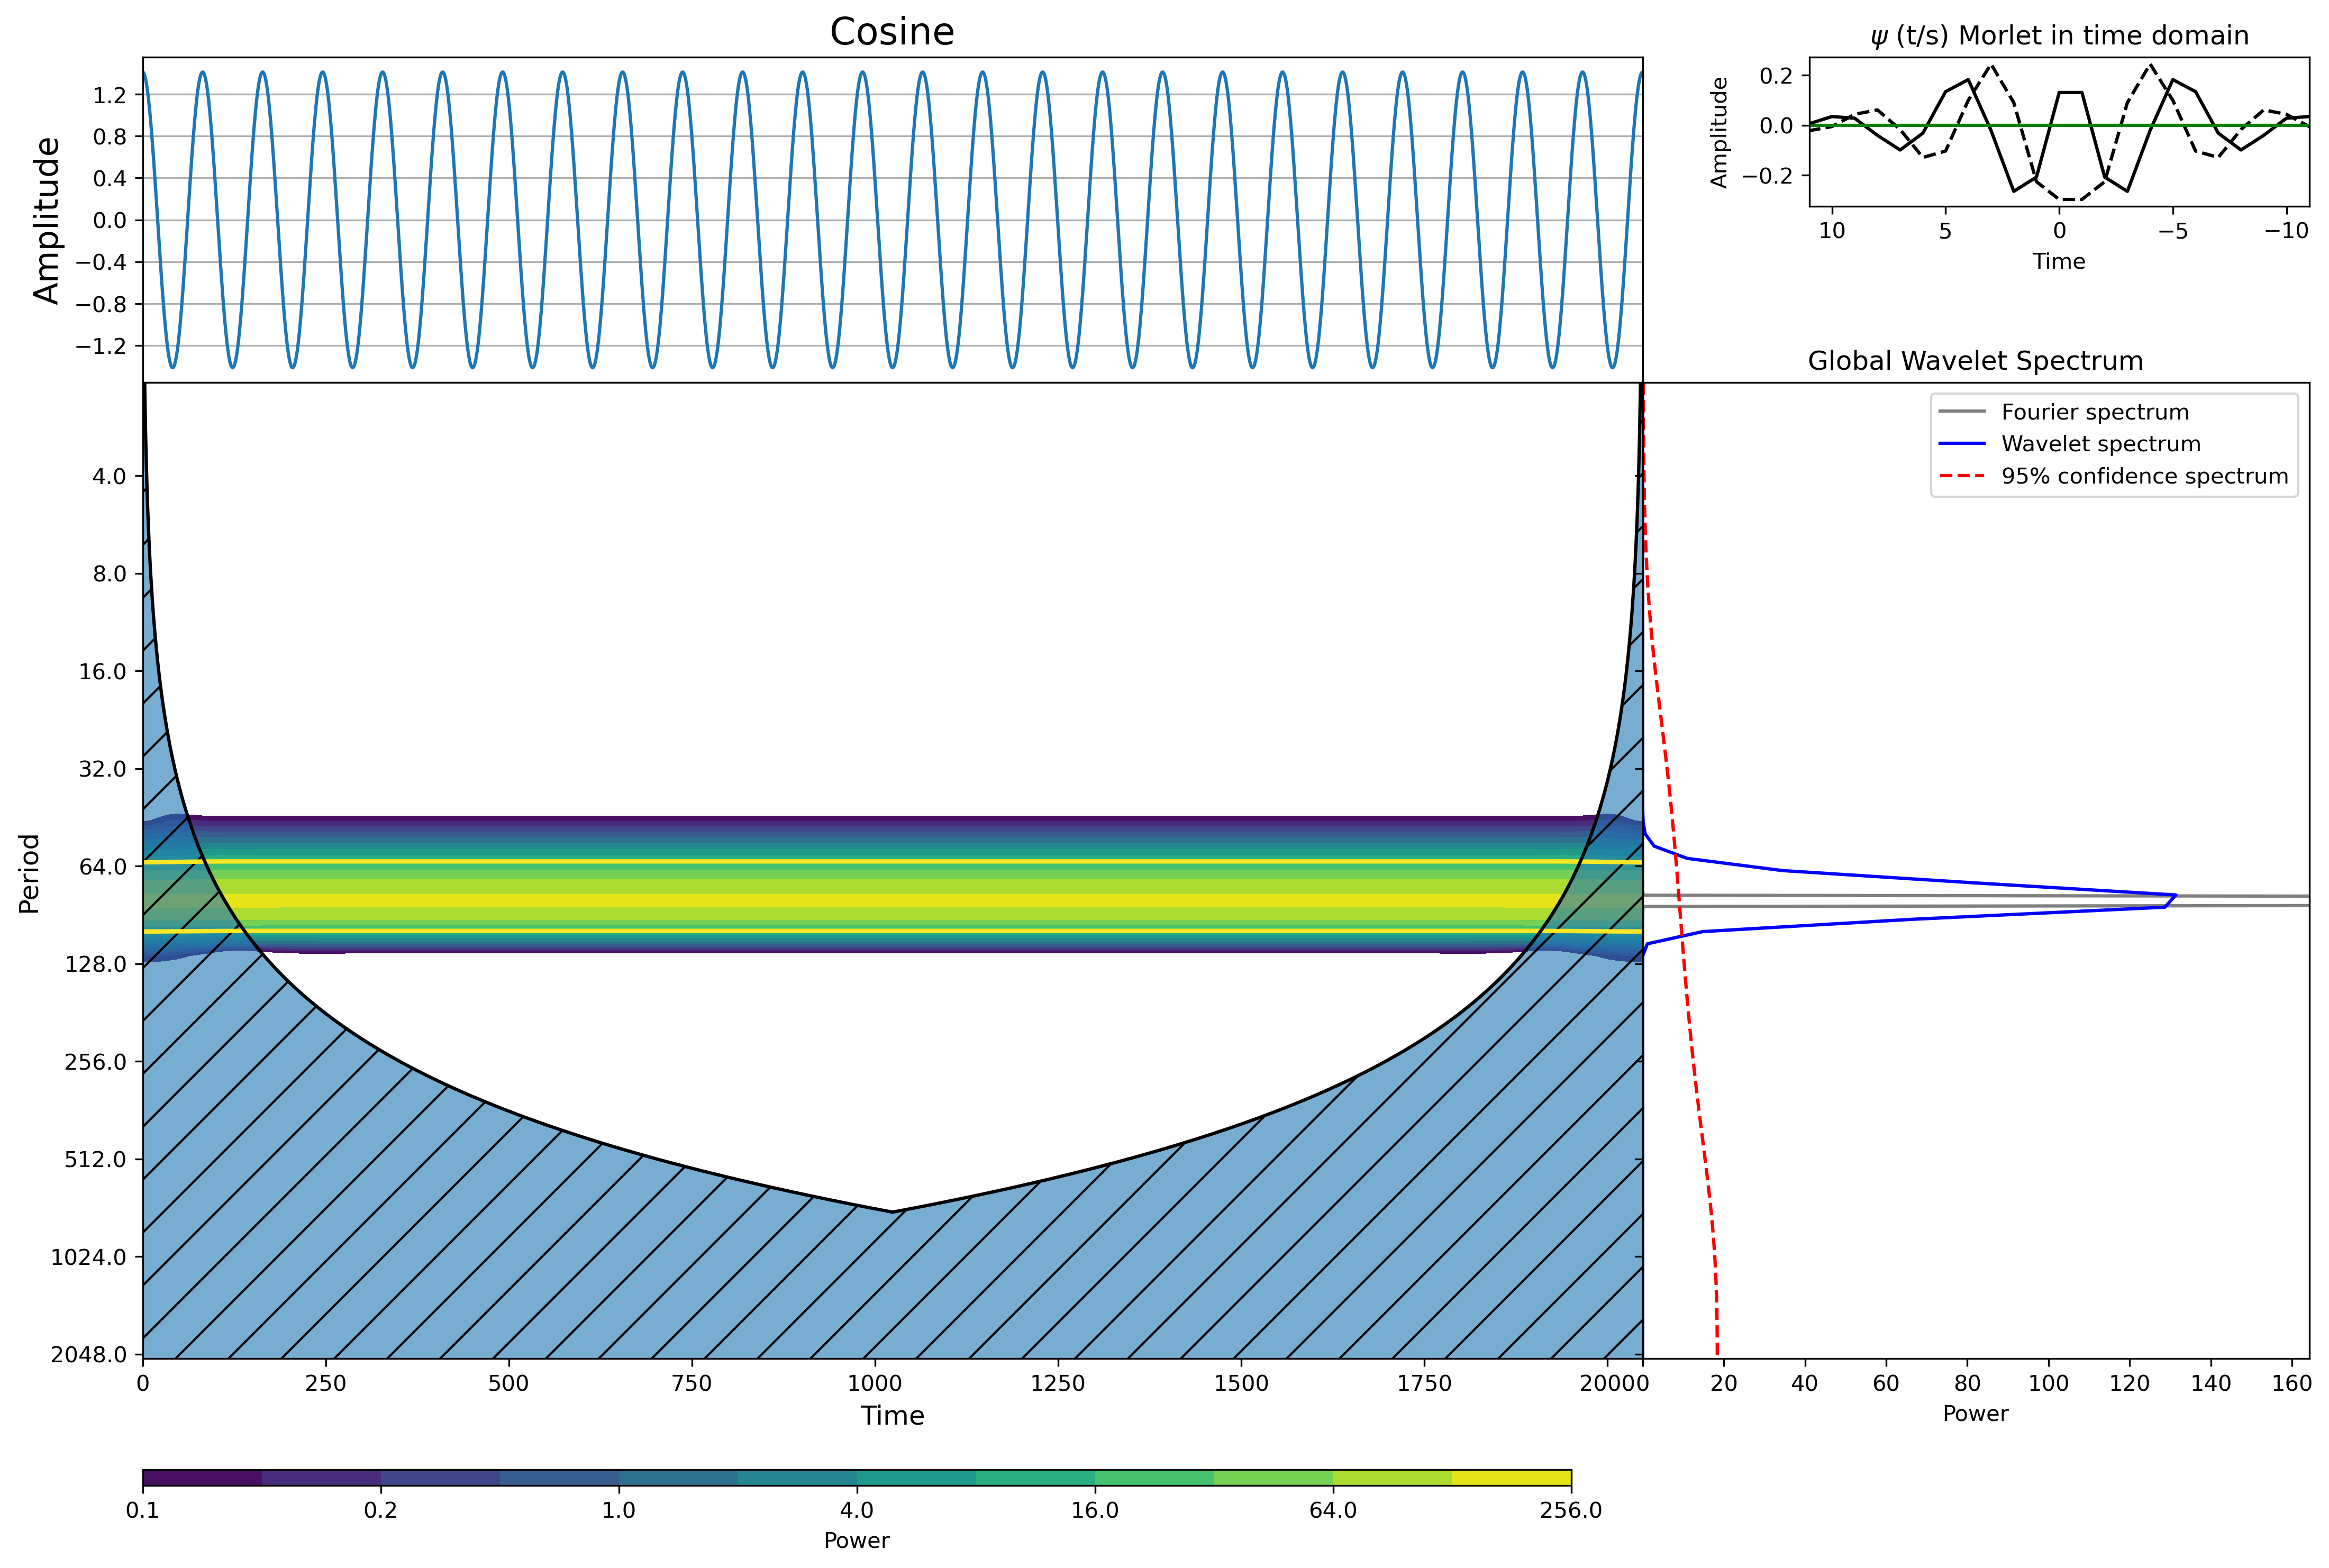

In [46]:
# plicamos para coseno
data_norm1 = waipy.normalize(y)
result1 = waipy.cwt(data_norm1, 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='y')
dtmin = 0.25/8    # dt/n of suboctaves
waipy.wavelet_plot('Cosine', z, data_norm1, dtmin, result1)

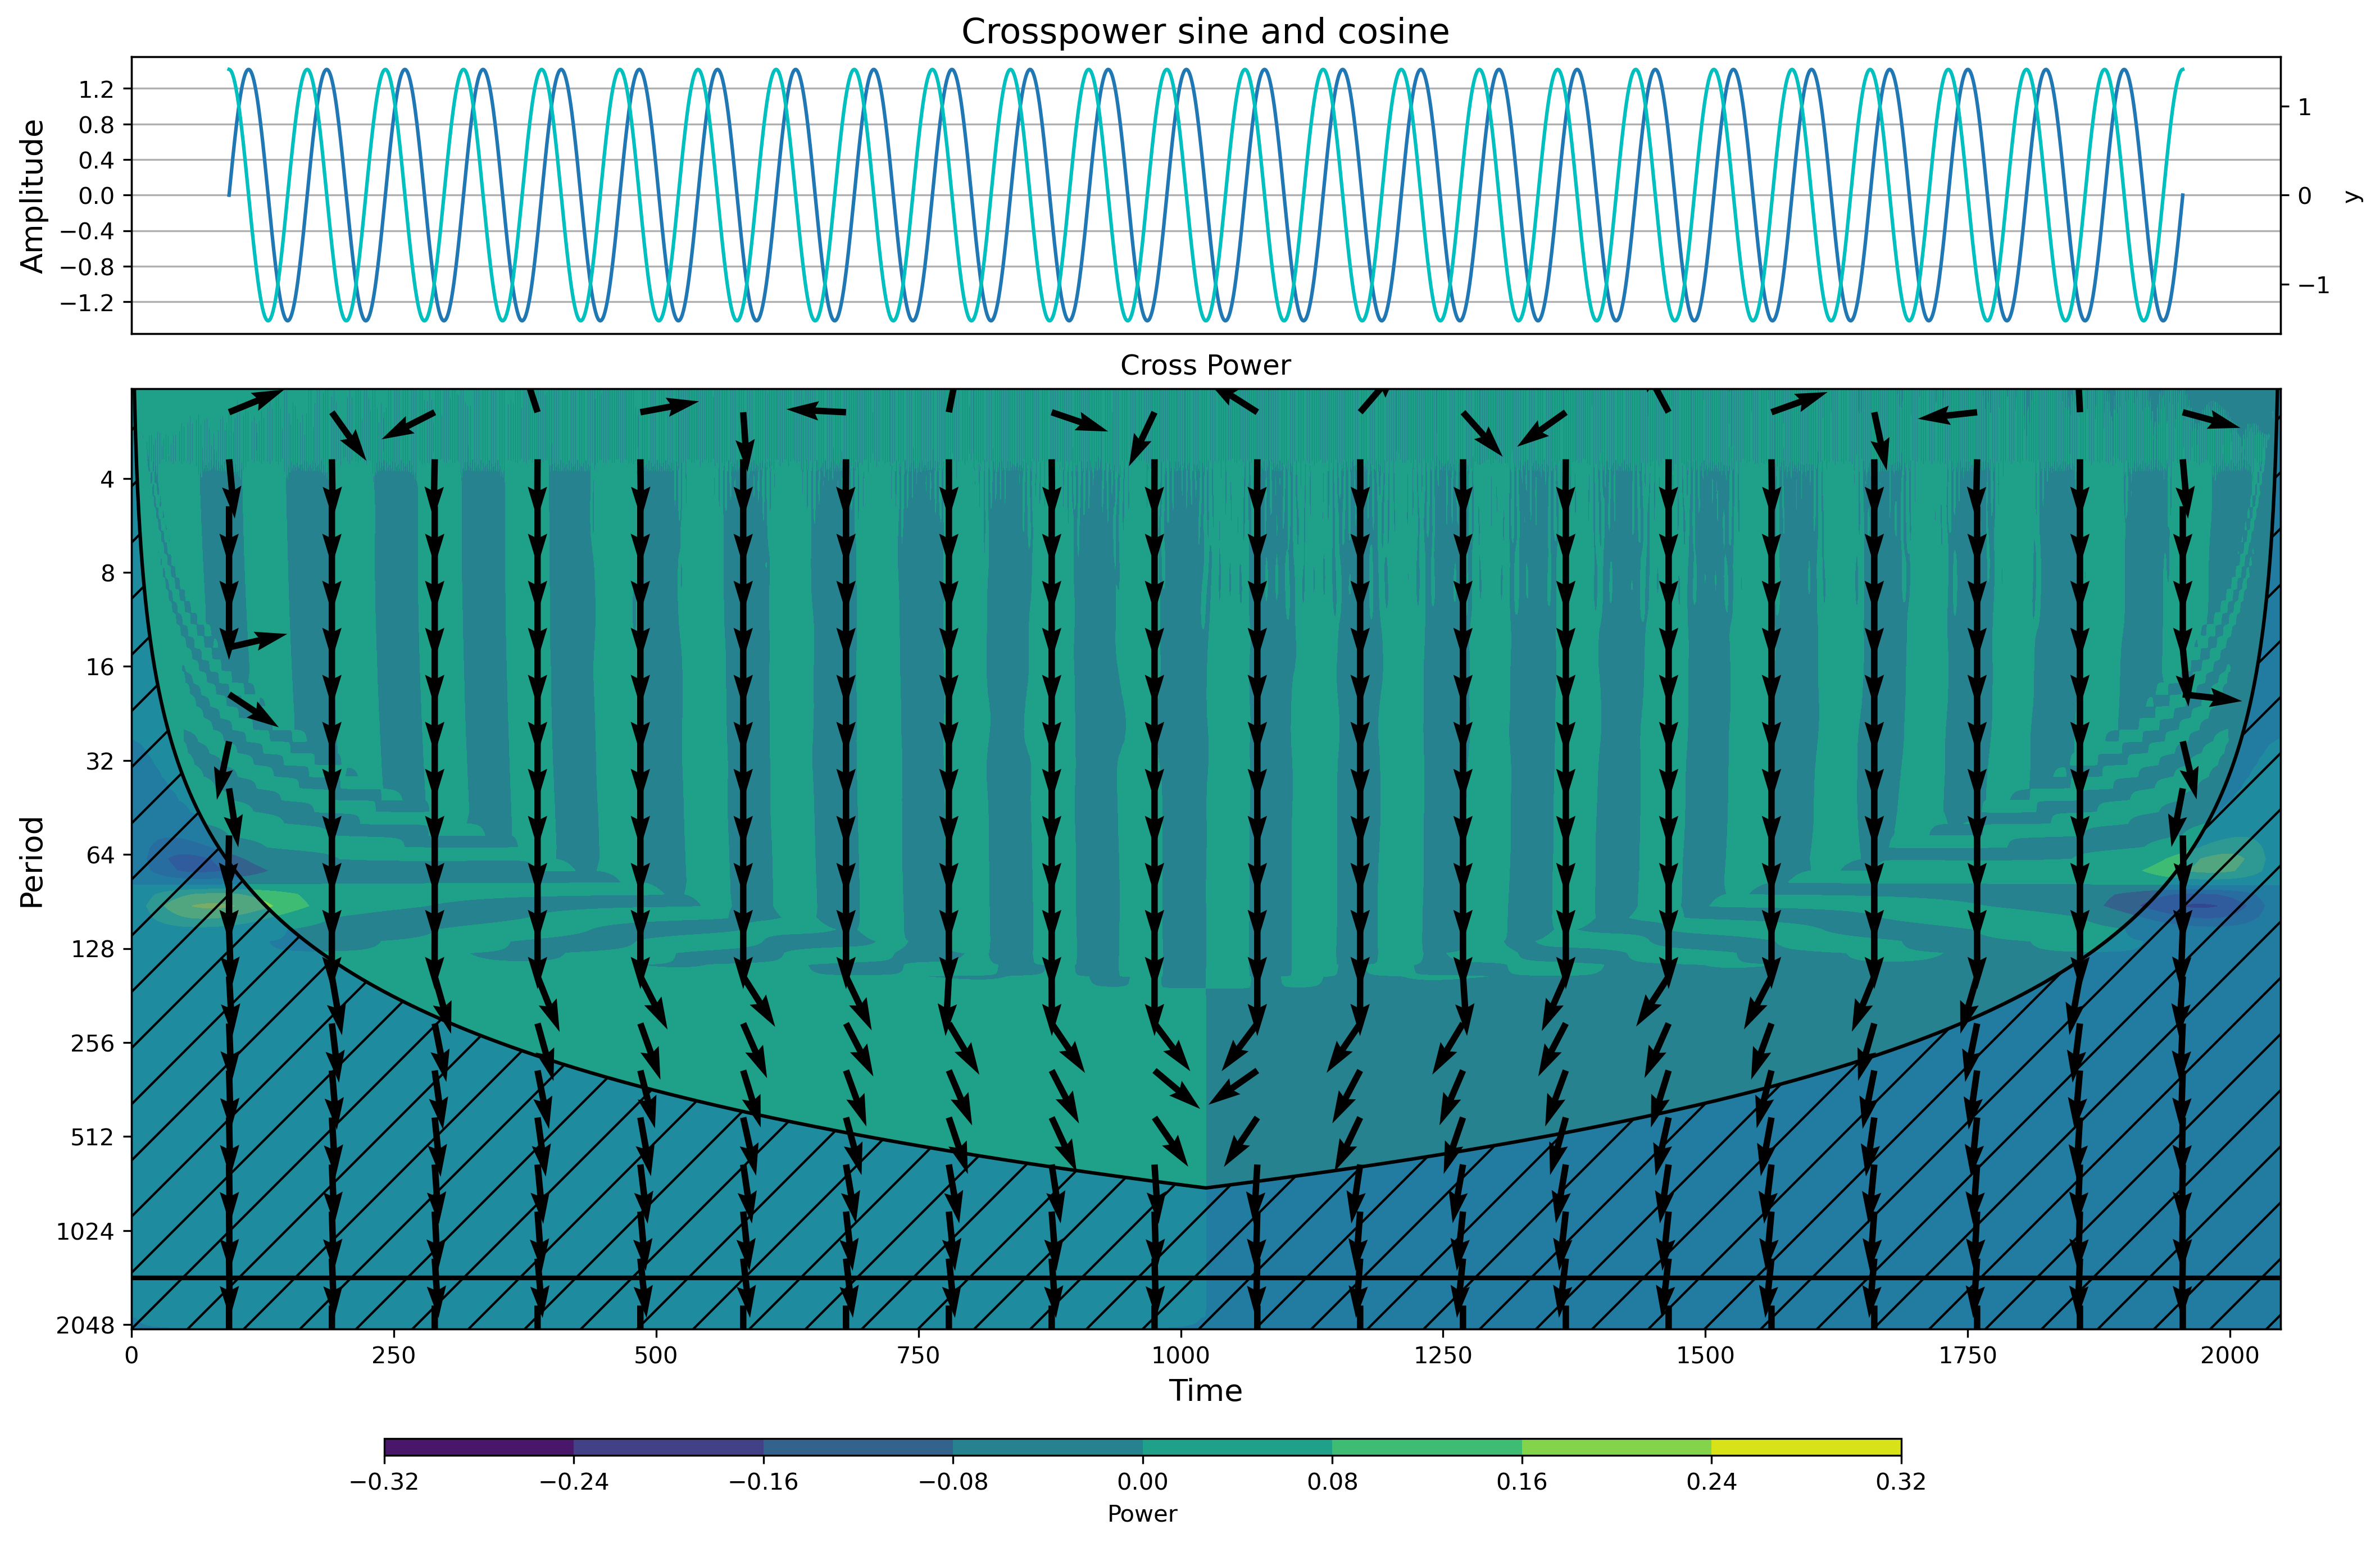

In [47]:
WPS12, coherence, phase_angle,cross_power = waipy.cross_wavelet(result['wave'], result1['wave'])
figname='example1.png'
waipy.plot_cross('Crosspower sine and cosine', cross_power, phase_angle, z, result, result1,figname)

Nr of Scales: 14
scales [2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522]


{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <AxesSubplot:title={'center':'Signal random'}, ylabel='Amplitude'>,
 'ax_cwt': <AxesSubplot:xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <AxesSubplot:title={'center':'$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <AxesSubplot:title={'center':'Global Wavelet Spectrum'}, xlabel='Power'>}

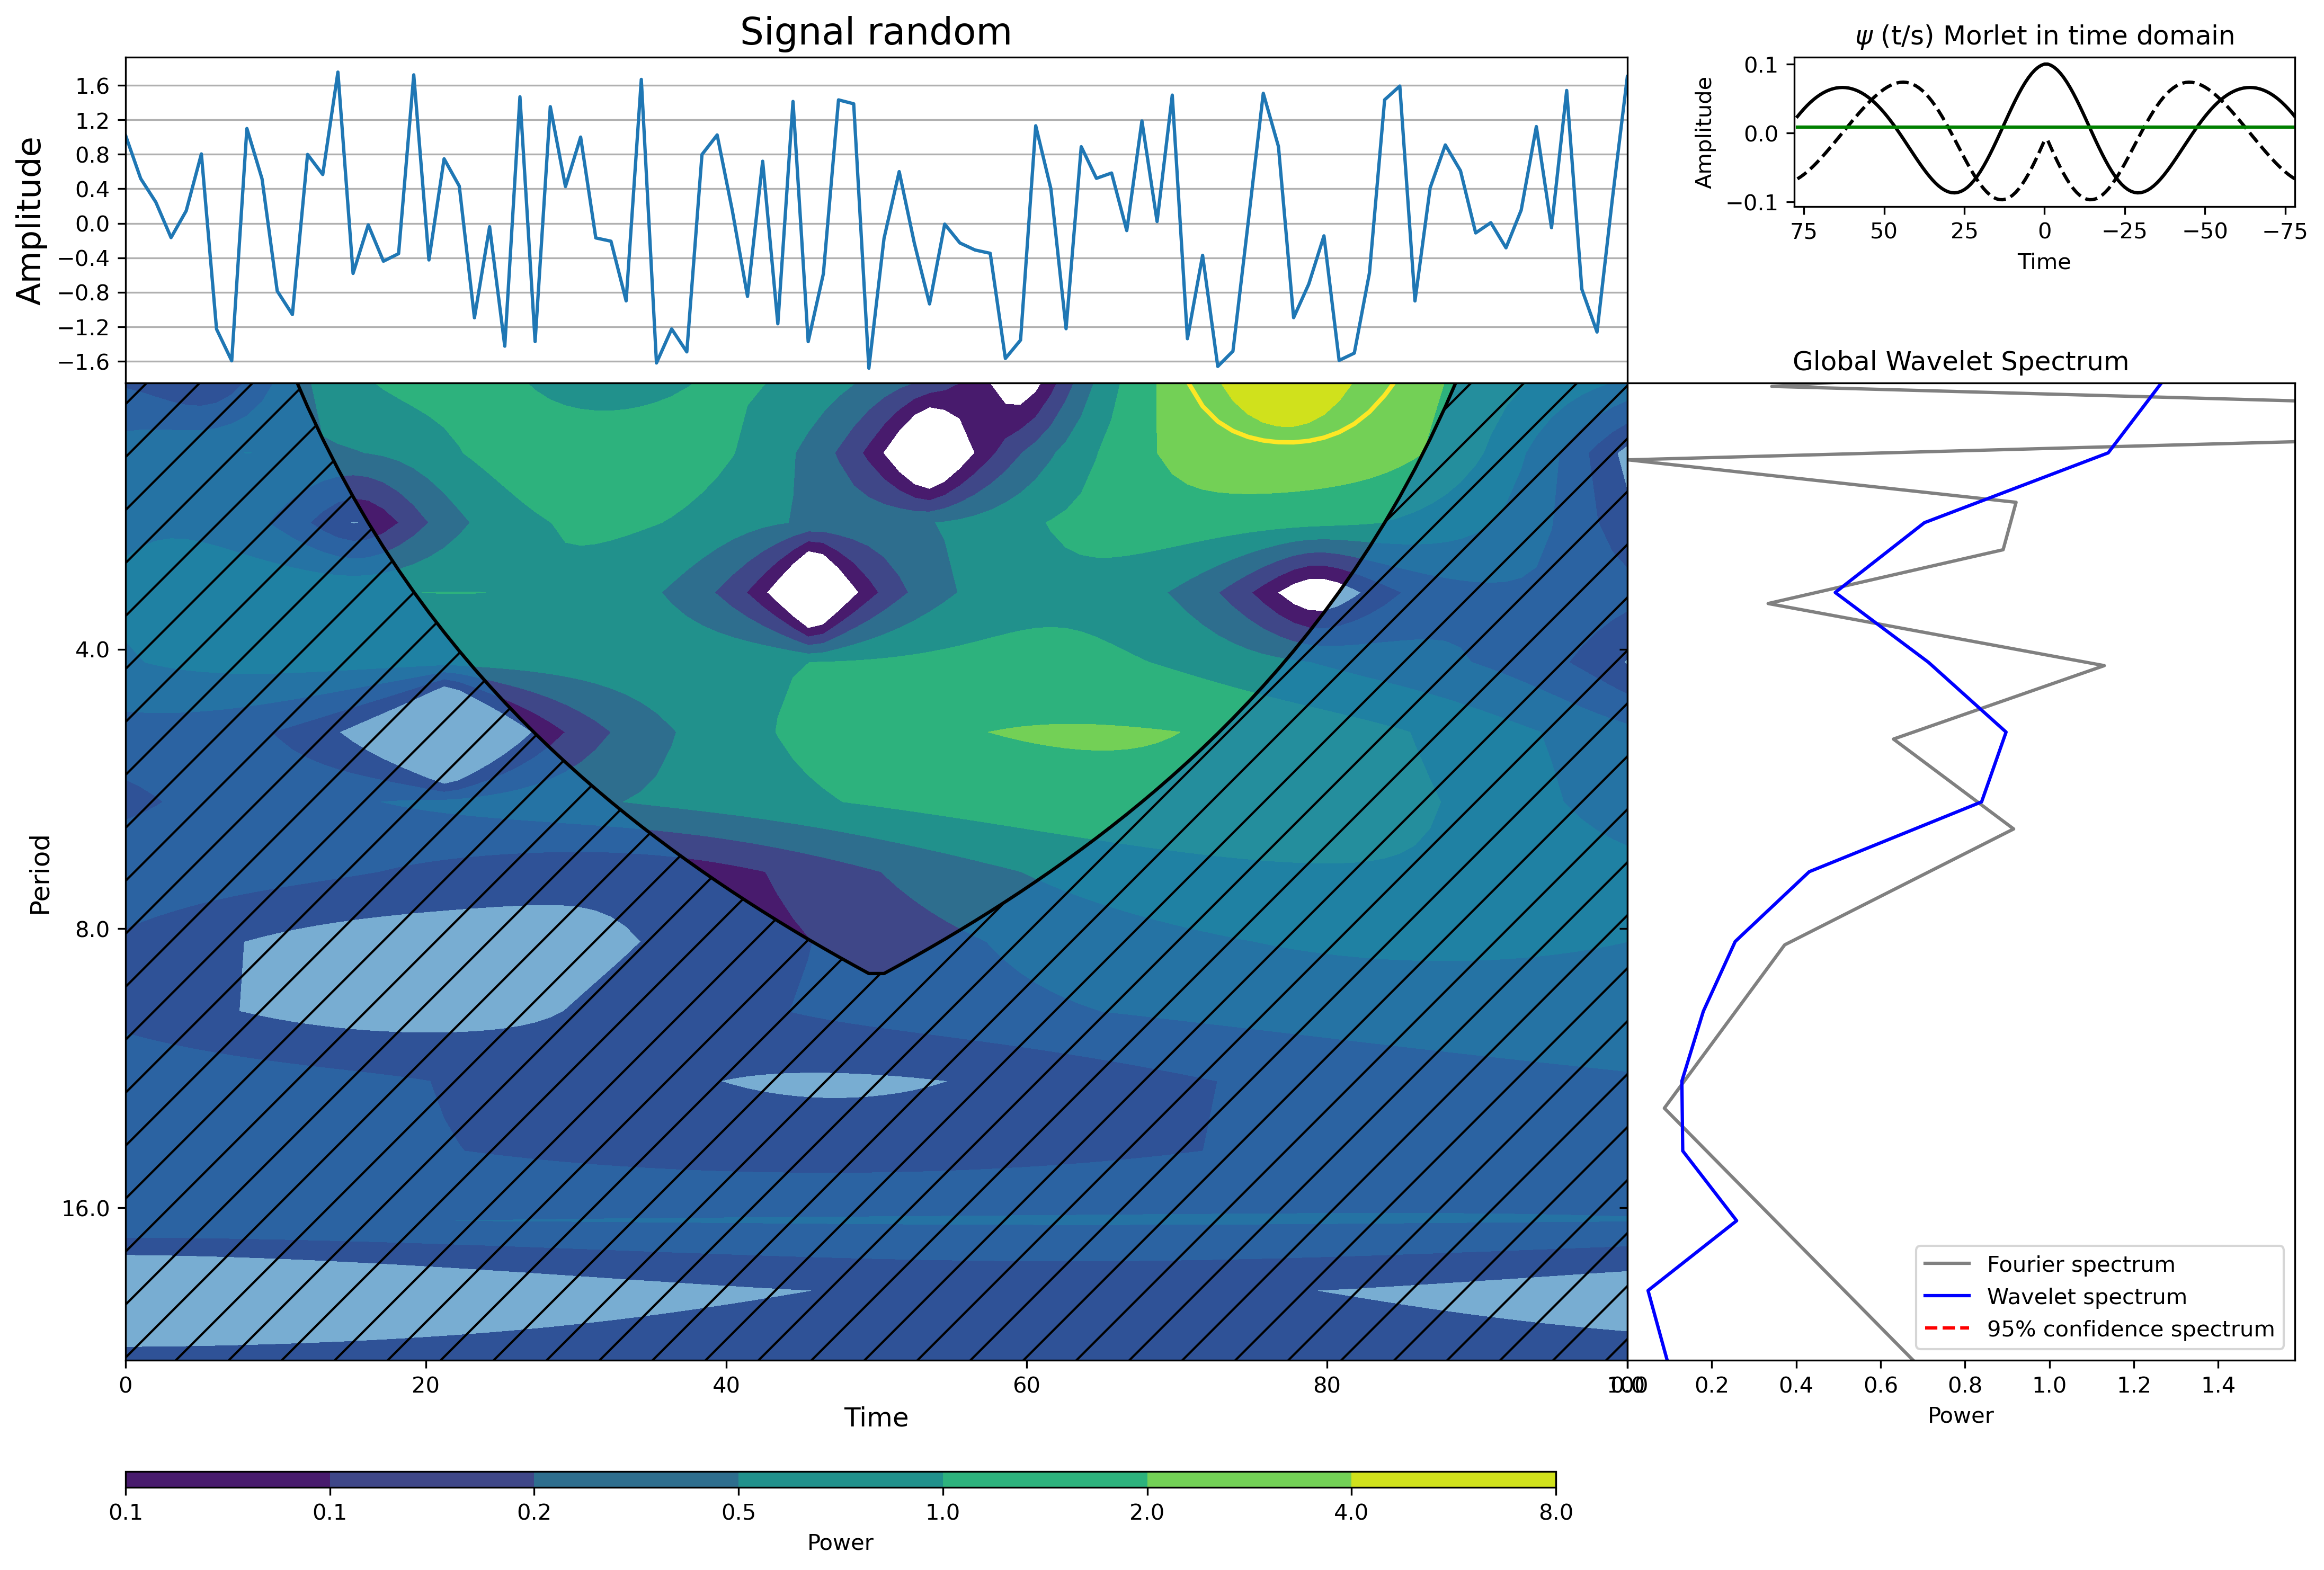

In [72]:
# implementamos a una señal random

x = np.linspace(0,100,100)
y1 = np.random.rand(100)  # Generation of the Random Signal 1

#normalizamos la señal
data_norm = waipy.normalize(y1)

dt =1
pad = 1         # pad the time series with zeroes (recommended)
dj = 0.25       # this will do 4 sub-octaves per octave
s0 = 2*dt       # this says start at a scale 
j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72     # lag-1 autocorrelation for red noise background
param = 6
mother = 'Morlet' #esta señal puede ser modificada
dt = 1/4.
dtmin = 0.25/8    # dt/n of suboctaves

result = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='x')

waipy.wavelet_plot('Signal random', x, data_norm, dtmin, result)